In [1]:
import numpy as np
from PIL import Image
import os
print(os.listdir("../input/cell_images/cell_images"))

# Any results you write to the current directory are saved as output.

['Uninfected', 'Parasitized']


In [2]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from sklearn.metrics import precision_score, recall_score
from keras.layers import Dense,BatchNormalization,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D

Using TensorFlow backend.


In [3]:
img_width, img_height = 64,64
l_rate = 0.001
_batch_size = 16
_epochs = 12
train_dir = "../input/cell_images/cell_images"


In [4]:
#model
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

SGD = optimizers.sgd(lr = l_rate, decay= 1e-6 , momentum=0.8, nesterov=True)
model.compile(
loss='binary_crossentropy',
optimizer=SGD,
metrics=['accuracy']
)
print('Compiled')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
activation_2 (Activat

In [5]:
datagen = ImageDataGenerator(
rescale= 1./255,
horizontal_flip=True,
vertical_flip=True,    
validation_split=0.2
)
train_generator = datagen.flow_from_directory(
directory=train_dir,
target_size=(img_width, img_height),
classes=['Parasitized','Uninfected'],
class_mode='binary',
batch_size=_batch_size,
subset='training'
)
validation_generator = datagen.flow_from_directory(
directory=train_dir,
target_size=(img_width, img_height),
classes=['Parasitized','Uninfected'],
class_mode='binary',
batch_size=_batch_size,
subset='validation'
)
training = model.fit_generator(
generator=train_generator,
steps_per_epoch=1378,
epochs= _epochs,
validation_steps=344,
validation_data=validation_generator,
)
print('training done')
#model.save_weights('E://kaggle_malaria_detection//models//Malaria_cnn.h5')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/12
1378/1378 [==============================] - 216s 157ms/step - loss: 0.3970 - acc: 0.8148 - val_loss: 0.1942 - val_acc: 0.9282
Epoch 2/12
1378/1378 [==============================] - 197s 143ms/step - loss: 0.1746 - acc: 0.9409 - val_loss: 0.1919 - val_acc: 0.9296
Epoch 3/12
1378/1378 [==============================] - 197s 143ms/step - loss: 0.1599 - acc: 0.9473 - val_loss: 0.1602 - val_acc: 0.9421
Epoch 4/12
1378/1378 [==============================] - 198s 143ms/step - loss: 0.1480 - acc: 0.9504 - val_loss: 0.1589 - val_acc: 0.9408
Epoch 5/12
 463/1378 [=========>....................] - ETA: 2:02 - loss: 0.1441 - acc: 0.9532

Gonna predict these images.
         1st is Parasitized
         2nd is Uninfected


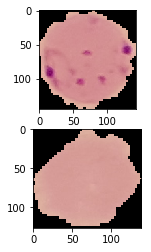

In [6]:
import matplotlib.pyplot as plt
rand_img_P = "../input/cell_images/cell_images/Parasitized/C101P62ThinF_IMG_20150918_151149_cell_69.png"
img_P = Image.open(rand_img_P)
rand_img_U = "../input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_150041_cell_127.png"
img_U = Image.open(rand_img_U)
f, axarr = plt.subplots(2)
axarr[0].imshow(img_P)
axarr[1].imshow(img_U)
print('''Gonna predict these images.
         1st is Parasitized
         2nd is Uninfected''')

In [7]:
print('Classes : ',train_generator.class_indices)
img_P = np.asarray(img_P.resize((64,64)))
img_P = img_P.reshape(1,64,64,3)
img_U = np.asarray(img_U.resize((64,64)))
img_U = img_U.reshape(1,64,64,3)

x1 = model.predict_classes(img_P)
x2 = model.predict_classes(img_U)

print("Prediction for Parasitized Image : ",x1)
print("Prediction for Uninfected Image : ",x2)

Classes :  {'Parasitized': 0, 'Uninfected': 1}
Prediction for Parasitized Image :  [[0]]
Prediction for Uninfected Image :  [[1]]
